## Charger les fichiers

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [228]:
path = 'Data_use_case_Yelp/'

restaurants_file = path + 'restaurants.csv'
checkin_file = path + 'checkin.csv'
review_file = path + 'review.csv'
tip_file = path + 'tip.csv'
user_file = path + 'user.csv'
services_file = path + 'services.csv'
hours_file = path + 'hours.csv'

In [229]:
business = pd.read_csv(restaurants_file,on_bad_lines='skip', low_memory=False)
user = pd.read_csv(user_file, on_bad_lines='skip', low_memory=False)
review = pd.read_csv(review_file, on_bad_lines='skip',low_memory=False)
checkin = pd.read_csv(checkin_file, on_bad_lines='skip',low_memory=False)
tip = pd.read_csv(tip_file, on_bad_lines='skip',low_memory=False)
services = pd.read_csv(services_file,on_bad_lines='skip',low_memory=False)
hours = pd.read_csv(hours_file, on_bad_lines='skip',low_memory=False)


## Nettoyage de code, filtrage et plus

In [230]:
#Colonnes à garder business
business = business[[
    "business_id", "nom", "moyenne_etoiles", "ville", "zone", "ferme"
]]
business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
2,0vhi__HtC2L4-vScgDFdFw,Midori Japanese Cafe,3.5,Calgary,T2T,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0


In [231]:
business_ouverts = business[business["ferme"] == 0][["business_id", "ferme"]]
business_ouverts.head()


,business_id,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,0
1,pd0v6sOqpLhFJ7mkpIaixw,0
2,0vhi__HtC2L4-vScgDFdFw,0
3,t65yfB9v9fqlhAkLnnUXdg,0
4,i7_JPit-2kAbtRTLkic2jA,0


In [232]:
#Colonnes à garder pour review
review_cols = ["review_id","user_id","business_id","etoiles","useful","funny","cool","date"
]
review.head()


,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [233]:
#renommer les colonnes utilisateur et restaurant
review = review.rename(columns={
    "utilisateur_id": "user_id",
    "restaurant_id": "business_id"
})

In [234]:

review = review.dropna(subset=["review_id","user_id","business_id","etoiles","useful","funny","cool","date"])
review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [235]:
#Convertir la date en format datetime
review["date"] = pd.to_datetime(review["date"], errors="coerce")

review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,2018-01-09 20:56:38
1,8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1.0,3,1,1,2010-10-05 19:12:35
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,2016-05-07 01:36:53
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00


In [236]:
#Nettoyer Users
user_cols = ["user_id", "nom", "elite", "nb_avis", "nb_avis_mention"]
user = user[user_cols]

user.head()

,user_id,nom,elite,nb_avis,nb_avis_mention
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,1,95,84
1,4XChL029mKr5hydo79Ljxg,Jenna,0,33,48
2,bc8C_eETBWL0olvFSJJd0w,David,0,16,28
3,MM4RJAeH6yuaN8oZDSt0RA,Nancy,1,361,1114
4,TEtzbpgA2BFBrC0y0sCbfw,Keane,1,1122,13311


In [237]:
#Nettoyage TIP 
tip_cols = ["user_id", "business_id", "nb_compliments", "date"] 
tip = tip[tip_cols]

tip.head()

,user_id,business_id,nb_compliments,date
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24
1,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17
2,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49
3,CaFbX7topxdLpBJ_SNDfGQ,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33
4,8zXgNCkusOHMwh5Tj_8yCQ,qrSsS0pk7SL67MP5nN8tlg,0,2013-12-22 05:10:12


In [238]:
#Nettoyer Hours
hour_cols = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]

#Retirer les lignes où toutes les heures sont vides
hours = hours.dropna(subset=hour_cols, how="all")

#Garder uniquement business_id et les colonnes d'heures
hours_cols_keep = ["business_id"] + hour_cols
hours = hours[hours_cols_keep]

hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
2,0vhi__HtC2L4-vScgDFdFw,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-22:0,16:30-21:30
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN


In [239]:
#Nettoyer Checkin
checkin["date"] = checkin["date"].fillna("").str.strip()
checkin["date_list"] = checkin["date"].apply(lambda d: d.split(",") if d != "" else [])

checkin.head()

,business_id,date,date_list
0,--1UhMGODdWsrMastO9DZw,2016-04-26 19:49:16,[2016-04-26 19:49:16]
1,--1UhMGODdWsrMastO9DZw,2016-08-30 18:36:57,[2016-08-30 18:36:57]
2,--1UhMGODdWsrMastO9DZw,2016-10-15 02:45:18,[2016-10-15 02:45:18]
3,--1UhMGODdWsrMastO9DZw,2016-11-18 01:54:50,[2016-11-18 01:54:50]
4,--1UhMGODdWsrMastO9DZw,2017-04-20 18:39:06,[2017-04-20 18:39:06]


In [240]:
#Nettoyer Hours
hour_cols = ["lundi","mardi","mercredi",
             "jeudi","vendredi","samedi","dimanche"]
hours = hours.dropna(subset=hour_cols, how="all")

hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
2,0vhi__HtC2L4-vScgDFdFw,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-22:0,16:30-21:30
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN


In [241]:
prix = services[["business_id", "prix"]]
prix.head()

,business_id,prix
0,lCwqJWMxvIUQt1Re_tDn4w,2
1,pd0v6sOqpLhFJ7mkpIaixw,2
2,0vhi__HtC2L4-vScgDFdFw,2
3,t65yfB9v9fqlhAkLnnUXdg,1
4,i7_JPit-2kAbtRTLkic2jA,3


In [242]:
# Filtrer les filles
villes= ["Phoenix", "Las Vegas", "Toronto"]
business = business[business["ville"].isin(villes)]

business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0
5,vMh4madPU3qhNX7P7d8WGA,Ray's Pizza II,3.0,Phoenix,85085,0


In [243]:
# filtrer review, tip, checkin, hours selon business_id
id_validation = set(business["business_id"])
review = review[review["business_id"].isin(id_validation)]
tip = tip[tip["business_id"].isin(id_validation)]
checkin = checkin[checkin["business_id"].isin(id_validation)]
hours = hours[hours["business_id"].isin(id_validation)]


In [244]:
business.head()

,business_id,nom,moyenne_etoiles,ville,zone,ferme
0,lCwqJWMxvIUQt1Re_tDn4w,Denny's,2.5,Las Vegas,89110,0
1,pd0v6sOqpLhFJ7mkpIaixw,Ike's Love & Sandwiches,4.0,Phoenix,85004,0
3,t65yfB9v9fqlhAkLnnUXdg,Pho U,3.5,Toronto,M5A,0
4,i7_JPit-2kAbtRTLkic2jA,John & Sons Oyster House,4.0,Toronto,M5H,0
5,vMh4madPU3qhNX7P7d8WGA,Ray's Pizza II,3.0,Phoenix,85085,0


In [245]:
review.head()

,review_id,user_id,business_id,etoiles,useful,funny,cool,date
3,JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1.0,1,1,0,2012-07-16 00:37:14
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,2015-04-01 16:30:00
5,4bUyL7lzoWzDZaJETAKREg,_N7Ndn29bpll_961oPeEfw,y-Iw6dZflNix4BdwIyTNGA,3.0,0,0,0,2014-06-27 21:19:23
6,D_UvaenM25iNd6aehTZ0MA,8NwU4TRsD3S6gIfBqFzDMQ,Sfc8Haz2Yri8Mo1L0E0TsA,5.0,0,0,0,2012-11-06 03:41:43
7,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33


In [246]:
tip.head()

,user_id,business_id,nb_compliments,date
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24
1,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17
3,CaFbX7topxdLpBJ_SNDfGQ,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33
4,8zXgNCkusOHMwh5Tj_8yCQ,qrSsS0pk7SL67MP5nN8tlg,0,2013-12-22 05:10:12
5,DfvT4F5Eqx9Xr3Ei3GYWPg,63bHLJUomC22Xdm3IjgBtw,0,2011-10-18 18:29:05


In [247]:
checkin.head()

,business_id,date,date_list
173,--DaPTJW3-tB1vP-PfdTEg,2012-06-03 17:46:09,[2012-06-03 17:46:09]
174,--DaPTJW3-tB1vP-PfdTEg,2012-08-04 16:19:52,[2012-08-04 16:19:52]
175,--DaPTJW3-tB1vP-PfdTEg,2012-08-04 16:26:17,[2012-08-04 16:26:17]
176,--DaPTJW3-tB1vP-PfdTEg,2012-08-06 20:14:27,[2012-08-06 20:14:27]
177,--DaPTJW3-tB1vP-PfdTEg,2012-08-09 22:17:11,[2012-08-09 22:17:11]


In [248]:
hours.head()

,business_id,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
0,lCwqJWMxvIUQt1Re_tDn4w,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
1,pd0v6sOqpLhFJ7mkpIaixw,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-22:0,11:0-22:0,11:0-17:0
3,t65yfB9v9fqlhAkLnnUXdg,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-21:0,NaN,11:30-21:0
4,i7_JPit-2kAbtRTLkic2jA,11:30-22:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-23:0,NaN,NaN
7,es3Fq9KNp6Ry994x4T4ZYg,6:30-16:0,6:30-16:0,6:30-16:0,6:30-16:0,6:30-16:0,7:0-14:0,NaN


## les jointures et les indicateurs


In [249]:
##### Compter combien il y a de réstaurant avec le meme nom #####
countingName = business["nom"].value_counts()
business["is_chain"] = business["nom"].map(countingName >= 3)

In [250]:
##### Compter le nombre de fois que le business apparait dans review #####
review_count = review["business_id"].value_counts().reset_index()
review_count.columns = ["business_id", "review_count_total"]

## Fusion review_count_total
business = business.merge(
    review_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["review_count_total"] = business["review_count_total"].fillna(0).astype(int)


In [251]:
##### Calculer le nombre de check in avec les dates #####
checkin_count = checkin.groupby("business_id")["date"].count().reset_index()
checkin_count.columns = ["business_id", "checkins_total"]

## Fusion checkins_total 
business = business.merge(
    checkin_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["checkins_total"] = business["checkins_total"].fillna(0).astype(int)



In [252]:

##### Ratio avis positif avec +4 stars #####
total_reviews = review.groupby("business_id")["etoiles"].count()
positive_reviews = review[review["etoiles"] >= 4].groupby("business_id")["etoiles"].count()

positive_ratio = (positive_reviews / total_reviews).fillna(0).reset_index().round(2)

positive_ratio.columns = ["business_id", "positive_ratio"]
positive_ratio["positive_ratio"] = positive_ratio["positive_ratio"].round(2)


## Fusion positive_ratio
business = business.merge(
    positive_ratio,
    on="business_id",
    how="left"
)

## Nettoyage
business["positive_ratio"] = business["positive_ratio"].fillna(0)


In [253]:

##### Community : Compter le nombre d'avis par des utilisateurs élites #####
eliteUsers_List = user[user["elite"] != 0]["user_id"].tolist()
review["is_elite_reviewer"] = review["user_id"].isin(eliteUsers_List).astype(int)

elite_review_count = review.groupby("business_id")["is_elite_reviewer"].sum().reset_index()
elite_review_count.columns = ["business_id", "elite_review_count"]

### Fusion elite_review
business = business.merge(
    elite_review_count,
    on="business_id",
    how="left"
)

## Nettoyage
business["elite_review_count"] = business["elite_review_count"].fillna(0).astype(int)


In [254]:

##### Changement prix en string #####
def changementString(price):
    if price == 0:
        return "Pas cher"
    elif price == 1:
        return "Normal"
    elif price == 2:
        return "Cher"
    elif price == 3:
        return "Très cher"
    elif price == 4:
        return "Gastronomique"
    else:
        return "NA"

# fusion prix
business = business.merge(
    services[["business_id", "prix"]],
    on="business_id",
    how="left"
)

## Source : https://stackoverflow.com/questions/33506826/call-function-use-apply-in-python
business["price_category"] = business["prix"].apply(changementString)




In [255]:
## Ici sera les fonctions qu'on va utilisé pour calculer la moyenne d'heure par jours

def convertisseurHeure(heure):
    if pd.isna(heure) or heure == "":
        return np.nan   

    h, m = heure.split(":")   
    return int(h) + int(m) / 60

def calculateur_heure(intervalle):
    if pd.isna(intervalle) or intervalle == "":
        return 0  ## ca veut simplement dire qu'il est fermé
    try:
        debut, fin = intervalle.split("-")
        debut_shift = convertisseurHeure(debut)
        fin_shift = convertisseurHeure(fin)
        return fin_shift - debut_shift
    except:
        return 0


## Soure : https://www.ionos.com/digitalguide/websites/web-development/python-pandas-dataframe-isna/
## Permet une verificaiton supplémentaire parce que dans le fichier il ya beaucoup de valeur NA, je pouvais aussi le mettre au fermé

In [256]:

## À la place de faire une liste de jours, on va simpleemnt charger les valeurs des colonnes en excluant businessId
jours = [col for col in hours.columns if col != "business_id"]

for j in jours:
    hours[j] = hours[j].apply(calculateur_heure)

## Note de cours 
hours["avg_open_hours"] = hours[[j for j in jours]].mean(axis=1)


business = business.merge(
    hours[["business_id", "avg_open_hours"]],
    on="business_id",
    how="left"
)
## Nettoyage
business["avg_open_hours"] = business["avg_open_hours"].fillna(0).round(2)




In [257]:

##### Dataframe final #####
df_merge = business[[ 
    "nom",
    "ville",
    "price_category",
    "moyenne_etoiles",  
    "is_chain",
    "checkins_total",
    "review_count_total",
    "positive_ratio",
    "elite_review_count",
    "avg_open_hours",
]].copy()

## simple rename pour avg_stars
dataframe_final = df_merge.rename(columns={"moyenne_etoiles": "avg_stars"})

dataframe_final.head()


,nom,ville,price_category,avg_stars,is_chain,checkins_total,review_count_total,positive_ratio,elite_review_count,avg_open_hours
0,Denny's,Las Vegas,Cher,2.5,True,181,72,0.31,6,0.00
1,Ike's Love & Sandwiches,Phoenix,Cher,4.0,False,492,108,0.76,25,9.14
2,Pho U,Toronto,Normal,3.5,False,18,36,0.58,3,8.14
3,John & Sons Oyster House,Toronto,Très cher,4.0,False,110,88,0.72,37,7.93
4,Ray's Pizza II,Phoenix,Cher,3.0,False,16,16,0.50,3,0.00


## Vérifier les types

In [258]:
business["business_id"] = business["business_id"].astype(str)
business["nom"] = business["nom"].astype(str)
business["moyenne_etoiles"] = business["moyenne_etoiles"].astype(float)
business["ville"] = business["ville"].astype(str)
business["zone"] = business["zone"].astype(str) 
business["ferme"] = business["ferme"].astype(int)



In [259]:
business.dtypes

business_id            object
nom                    object
moyenne_etoiles       float64
ville                  object
zone                   object
ferme                   int64
is_chain                 bool
review_count_total      int64
checkins_total          int64
positive_ratio        float64
elite_review_count      int64
prix                    int64
price_category         object
avg_open_hours        float64
dtype: object

In [260]:
review["review_id"] = review["review_id"].astype(str)
review["user_id"] = review["user_id"].astype(str)
review["business_id"] = review["business_id"].astype(str)
review["etoiles"] = review["etoiles"].astype(float)
review["useful"] = review["useful"].astype(int)
review["funny"] = review["funny"].astype(int)
review["cool"] = review["cool"].astype(int)
review["date"] = pd.to_datetime(review["date"], errors="coerce")


In [261]:
review.dtypes

review_id                    object
user_id                      object
business_id                  object
etoiles                     float64
useful                        int64
funny                         int64
cool                          int64
date                 datetime64[ns]
is_elite_reviewer             int64
dtype: object

In [262]:
user["user_id"] = user["user_id"].astype(str)
user["nom"] = user["nom"].astype(str)
user["elite"] = user["elite"].astype(str)
user["nb_avis"] = user["nb_avis"].astype(int)
user["nb_avis_mention"] = user["nb_avis_mention"].astype(int)


In [263]:
user.dtypes

user_id            object
nom                object
elite              object
nb_avis             int64
nb_avis_mention     int64
dtype: object

In [264]:
hours["business_id"] = hours["business_id"].astype(str)

hour_cols = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]

for col in hour_cols:
    hours[col] = hours[col].astype(str)


In [265]:
hours.dtypes

business_id        object
lundi              object
mardi              object
mercredi           object
jeudi              object
vendredi           object
samedi             object
dimanche           object
avg_open_hours    float64
dtype: object

In [266]:
checkin["business_id"] = checkin["business_id"].astype(str)

In [267]:
checkin.dtypes

business_id    object
date           object
date_list      object
dtype: object

In [268]:
tip["user_id"] = tip["user_id"].astype(str)
tip["business_id"] = tip["business_id"].astype(str)
tip["nb_compliments"] = tip["nb_compliments"].astype(int)
tip["date"] = pd.to_datetime(tip["date"], errors="coerce")


In [269]:
tip.dtypes

user_id                   object
business_id               object
nb_compliments             int64
date              datetime64[ns]
dtype: object

In [270]:
services["business_id"] = services["business_id"].astype(str)

serviceEnInt = ["emporter","livraison","bon_pour_groupes","bon_pour_enfants","reservation","prix","terrasse"]

for col in serviceEnInt:
    services[col] = services[col].astype(int)


In [271]:
services.dtypes

business_id         object
emporter             int64
livraison            int64
bon_pour_groupes     int64
bon_pour_enfants     int64
reservation          int64
prix                 int64
terrasse             int64
dtype: object

## Création de deux visualisations

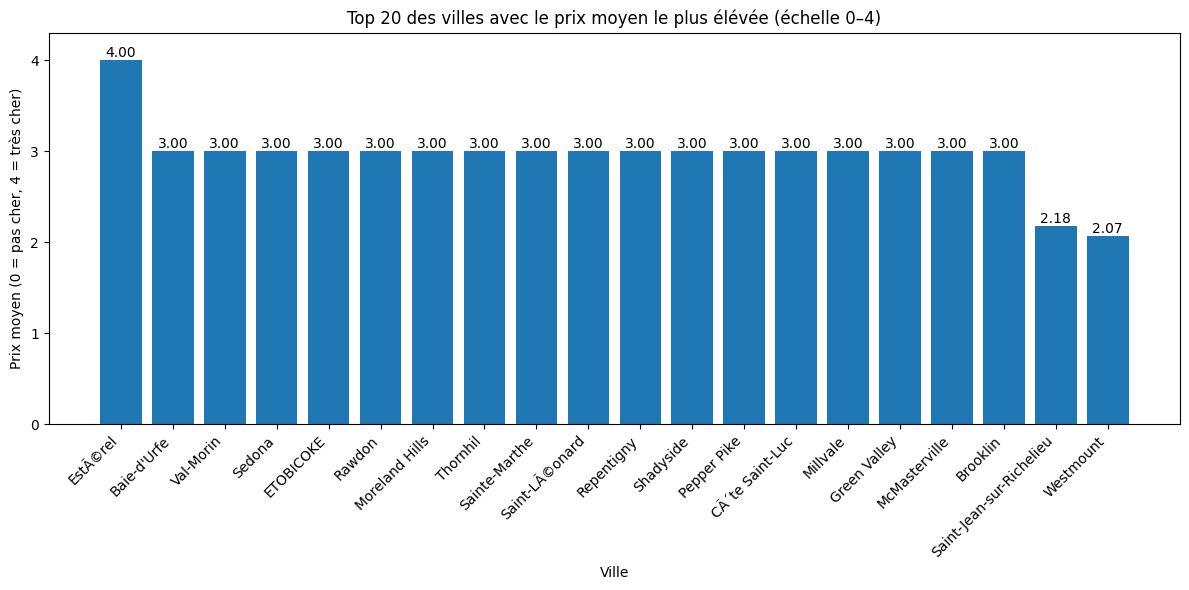

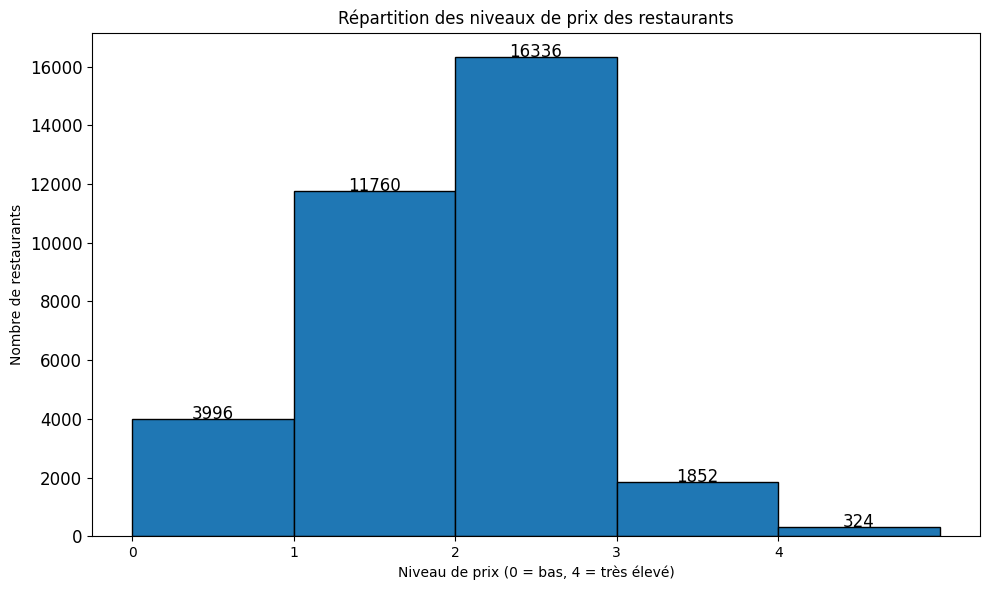

In [272]:
# lire les fichiers
business = pd.read_csv("Data_use_case_Yelp/restaurants.csv", low_memory=False)
service = pd.read_csv("Data_use_case_Yelp/services.csv", low_memory=False)

# join restaurants + services
merged = business.merge(service, on="business_id", how="inner")

# convertir la colonne prix (échelle 0–4)
merged["prix"] = pd.to_numeric(merged["prix"], errors="coerce")

# calculer le prix moyen par ville
ville_prix = (
    merged.groupby("ville")["prix"]
          .mean()
          #prendre les plus elever
          .sort_values(ascending=False)

)

top20 = ville_prix.head(20)

plt.figure(figsize=(12,6))
plt.bar(top20.index, top20.values, color="#1f77b4")

# ajouter les valeurs au-dessus des barres
for i, val in enumerate(top20.values):
    plt.text(i, val + 0.03, f"{val:.2f}", ha="center")

#definir titre et axes
plt.title("Top 20 des villes avec le prix moyen le plus élévée (échelle 0–4)")
plt.xlabel("Ville")
plt.ylabel("Prix moyen (0 = pas cher, 4 = très cher)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0,4.3)#je l'ai rajouter pour empecher la valeur afficher de brouiller le titre quand la valeur est 4.00
plt.yticks([0, 1, 2, 3, 4])
plt.tight_layout()
plt.show()

#####################################################################################################################################################
#2e graph statique ici pour prendre la meme liste merged

# histogramme des prix
plt.figure(figsize=(10,6))

# hist → retourne les count + bins
counts, bins, patches = plt.hist(
    service["prix"].dropna(),
    bins=[0,1,2,3,4,5],
    color="#1f77b4",
    edgecolor="black"
)

#ajouter le nombre de restaurants sur chaque barre pour une meilleur compréhension
for i, count in enumerate(counts):
    plt.text(
        i + 0.5,#centre de la barre
        count + 0.5,#au-dessus de la barre
        int(count),#convertir en nombre d'entiers
        ha="center",
        fontsize=12
    )

plt.title("Répartition des niveaux de prix des restaurants")
plt.xlabel("Niveau de prix (0 = bas, 4 = très élevé)")
plt.ylabel("Nombre de restaurants")
plt.xticks([0,1,2,3,4])
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()




## Top 20 des villes avec le prix moyen le plus élévée

Les variations entre les villes montrent que le prix moyen n’est pas uniforme à travers le dataset. Certaines villes présentent des valeurs proches de 4, ce qui suggère une concentration de restaurants coûteux, tandis que d’autres restent sous la barre de 2. Cela aide à comprendre comment les habitudes culinaires et la structure commerciale varient d’une région à l’autre.

## Répartition des niveaux de prix des restaurants

La répartition des restaurants selon leur niveau de prix montre que la grande majorité appartient aux catégories 1 et 2, ce qui correspond à des établissements peu chers à modérément chers. Le niveau 2 domine nettement avec plus de 16 000 restaurants, ce qui indique que l’offre la plus courante dans le dataset se situe dans une gamme de prix « moyenne ».

In [273]:
# Lire les fichiers
business = pd.read_csv("Data_use_case_Yelp/restaurants.csv", low_memory=False)
review = pd.read_csv("Data_use_case_Yelp/review.csv", low_memory=False)

# Fusion restaurants + services
merged = business.merge(review, on="business_id", how="inner")

# calcul des meilleurs restaurants par ville
best_restau_par_ville = (
    #merged avec review au lieu de services
    merged.groupby(["ville", "business_id"])
          .agg(
              nom=("nom", "first"),
              moyenne_etoiles=("moyenne_etoiles", "mean")
          )
          .reset_index()
)

villes = sorted(best_restau_par_ville["ville"].unique())

def carte_restaurant(ville):
    df = best_restau_par_ville[best_restau_par_ville["ville"] == ville]

    if df.empty:
        plt.figure(figsize=(6,3))
        plt.text(0.5, 0.5, "Aucun restaurant trouvé", ha="center", fontsize=14)
        plt.axis("off")
        plt.show()
        return

    # top restaurants selon la note
    best = df.sort_values("moyenne_etoiles", ascending=False).head(5)

    plt.figure(figsize=(10,5))
    plt.bar(best["nom"], best["moyenne_etoiles"], color="#1f77b4")

    plt.title(f"Meilleur(s) restaurant(s) à {ville}", pad=15)
    plt.ylabel("Note moyenne")
    plt.ylim(0, 5.3) #je l'ai rajouter pour empecher la valeur afficher de brouiller le titre quand la valeur est 5.00

    # ajouter les valeurs sur les barres
    for i, val in enumerate(best["moyenne_etoiles"]):
        plt.text(i, val + 0.05, f"{val:.2f}", ha="center")

    plt.xticks(rotation=20, ha="right")
    plt.tight_layout()
    plt.show()

interact(carte_restaurant, ville=villes);


interactive(children=(Dropdown(description='ville', options=('AGINCOURT', 'Ahwatukee', 'Airdrie', 'Ajax', 'Akr…

## Meilleur(s) restaurant(s) par ville
 
Ce graphique interactif permet de visualiser les meilleurs restaurants dans chaque ville selon leur note moyenne. L’utilisateur peut sélectionner une ville et obtenir instantanément les restaurants les mieux évalués. Cette approche est très pratique pour identifier les établissements les plus recommandés dans une région donnée. Elle peut par exemple aider un visiteur à choisir rapidement où manger lorsqu’il découvre une nouvelle ville.